In [1]:
# pip install torchsummary

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.optim as optim
import torchvision.models as models
from torchvision.models.alexnet import AlexNet_Weights
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
import seaborn as sns
from PIL import Image
from torchvision import models
from torchsummary import summary
from sklearn.metrics import classification_report
import random

In [3]:
train_path = '/kaggle/input/casting-512-512/Casting_512_512/train'
test_path = '/kaggle/input/casting-512-512/Casting_512_512/test'

In [4]:
transformations = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [5]:
train_dataset = datasets.ImageFolder(root=train_path, transform=transformations)
test_dataset = datasets.ImageFolder(root=test_path, transform=transformations)

In [6]:
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [7]:
weights = AlexNet_Weights.IMAGENET1K_V1
model = models.alexnet(weights=weights)

In [8]:
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, len(train_dataset.classes))

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=0.001)

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [11]:
print(summary(model,(3,224,224)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [12]:
train_loss_history = []
train_accuracy_history = []

num_epochs = 40

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total * 100
    
    train_loss_history.append(train_loss)
    train_accuracy_history.append(train_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

Epoch 1/40, Train Loss: 0.9409, Train Accuracy: 57.46%
Epoch 2/40, Train Loss: 0.6206, Train Accuracy: 65.16%
Epoch 3/40, Train Loss: 0.5535, Train Accuracy: 71.61%
Epoch 4/40, Train Loss: 0.5269, Train Accuracy: 73.92%
Epoch 5/40, Train Loss: 0.5213, Train Accuracy: 73.53%
Epoch 6/40, Train Loss: 0.4970, Train Accuracy: 76.23%
Epoch 7/40, Train Loss: 0.4852, Train Accuracy: 77.67%
Epoch 8/40, Train Loss: 0.4988, Train Accuracy: 76.52%
Epoch 9/40, Train Loss: 0.5662, Train Accuracy: 70.84%
Epoch 10/40, Train Loss: 0.5083, Train Accuracy: 76.71%
Epoch 11/40, Train Loss: 0.4692, Train Accuracy: 77.96%
Epoch 12/40, Train Loss: 0.4558, Train Accuracy: 78.92%
Epoch 13/40, Train Loss: 0.4780, Train Accuracy: 78.25%
Epoch 14/40, Train Loss: 0.4150, Train Accuracy: 81.04%
Epoch 15/40, Train Loss: 0.3851, Train Accuracy: 82.29%
Epoch 16/40, Train Loss: 0.3950, Train Accuracy: 82.77%
Epoch 17/40, Train Loss: 0.3833, Train Accuracy: 81.23%
Epoch 18/40, Train Loss: 0.3637, Train Accuracy: 83.35%
E

In [13]:
val_loss_history = []
val_accuracy_history = []

for epoch in range(num_epochs):
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for val_inputs, val_labels in test_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            
            val_running_loss += val_loss.item()
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

        # Append the average validation loss for the epoch
        val_loss = val_running_loss / len(test_loader)
        val_loss_history.append(val_loss)

    val_accuracy = 100 * val_correct / val_total
    val_accuracy_history.append(val_accuracy)

print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Validation Loss: 0.1548, Validation Accuracy: 95.40%


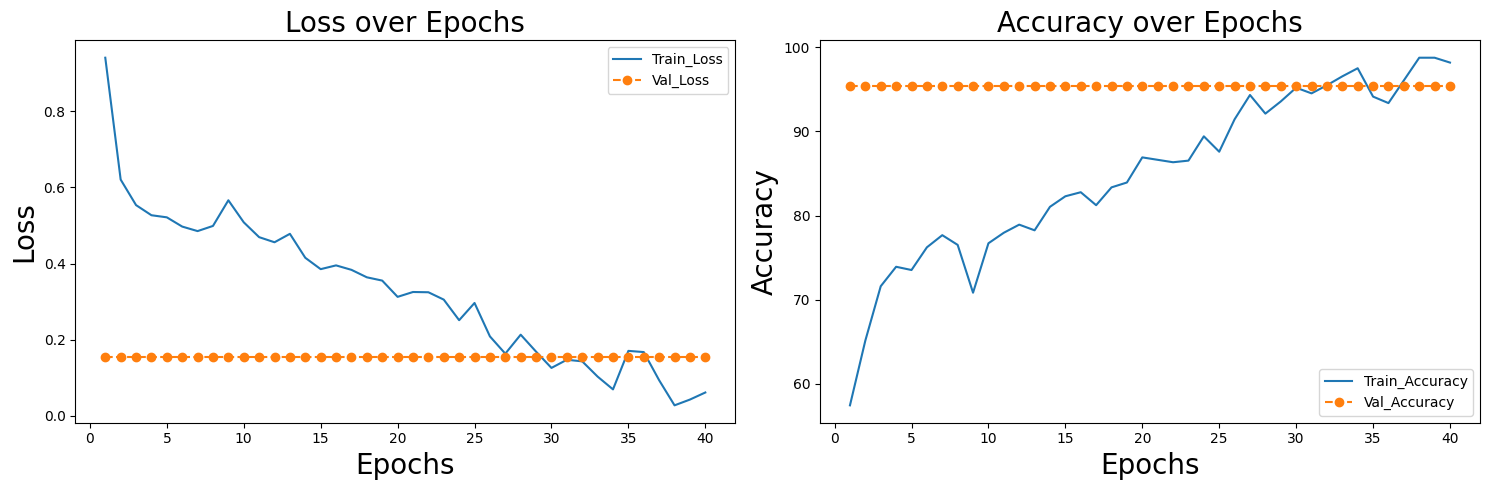

In [14]:
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Train_Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Val_Loss', linestyle='--', marker='o')
plt.title('Loss over Epochs',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Train_Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_history, label='Val_Accuracy', linestyle='--', marker='o')
plt.title('Accuracy over Epochs',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend()

plt.tight_layout()
plt.savefig('Loss and Accuracy.png', dpi=300)
plt.show()

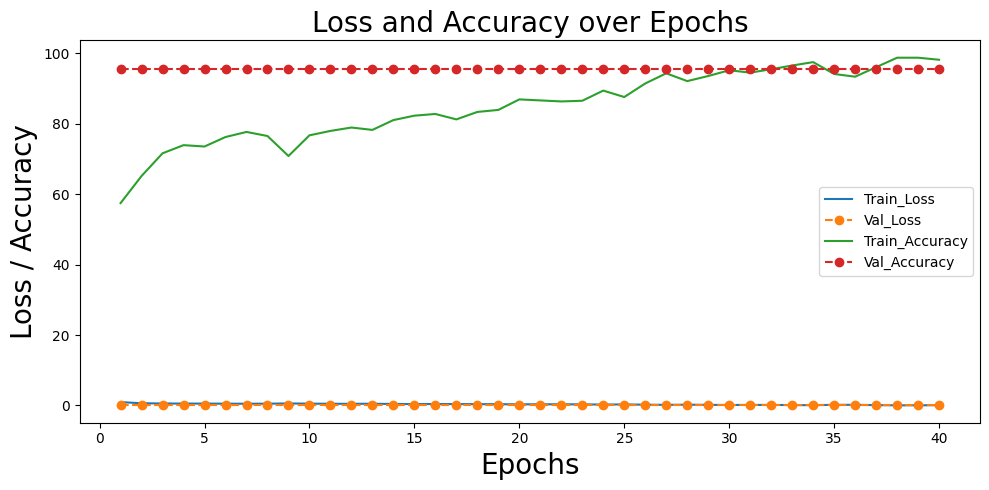

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loss plot
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Train_Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Val_Loss', linestyle='--', marker='o')

# Accuracy plot
plt.plot(range(1, num_epochs + 1), [acc for acc in train_accuracy_history], label='Train_Accuracy')
plt.plot(range(1, num_epochs + 1), [acc for acc in val_accuracy_history], label='Val_Accuracy', linestyle='--', marker='o')

plt.title('Loss and Accuracy over Epochs',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss / Accuracy',fontsize=20)
plt.legend()

plt.tight_layout()
plt.savefig('Loss and AccuracySingle.png', dpi=300)
plt.show()

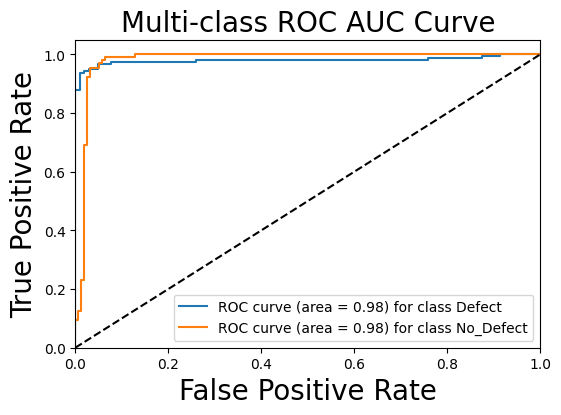

In [16]:
def plot_roc_curve(fpr, tpr, roc_auc, classes):
    plt.figure(figsize=(6, 4))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {classes[i]}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',fontsize=20)
    plt.ylabel('True Positive Rate',fontsize=20)
    plt.title('Multi-class ROC AUC Curve',fontsize=20)
    plt.legend(loc="lower right")
    plt.savefig('ROC_AUC.png', dpi=300)
    plt.show()

model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        y_pred.extend(outputs.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

y_pred = np.array(y_pred)
y_true = np.array(y_true)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(train_dataset.classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plot_roc_curve(fpr, tpr, roc_auc, train_dataset.classes)

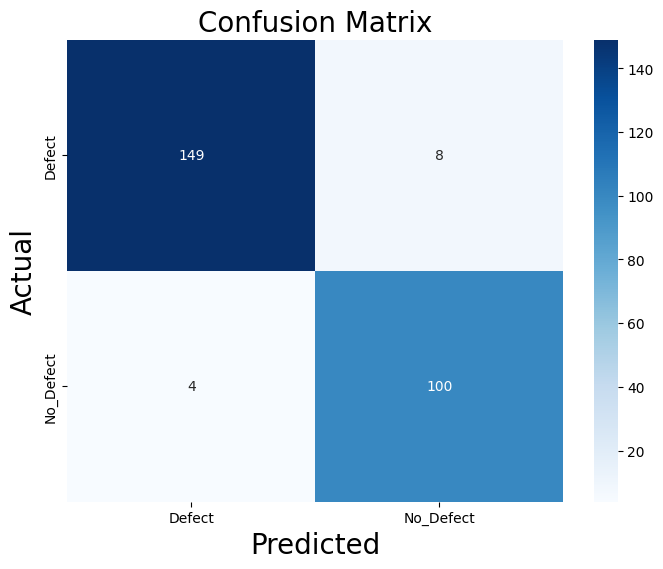

In [17]:
class_predictions = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, class_predictions)
labels = ['Defect', 'No_Defect']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.xlabel('Predicted',fontsize=20)
plt.savefig('ConfusionMatrix.png', dpi=300)
plt.show()

In [18]:
print(classification_report(y_true, class_predictions, target_names=train_dataset.classes))

              precision    recall  f1-score   support

      Defect       0.97      0.95      0.96       157
   No_Defect       0.93      0.96      0.94       104

    accuracy                           0.95       261
   macro avg       0.95      0.96      0.95       261
weighted avg       0.95      0.95      0.95       261



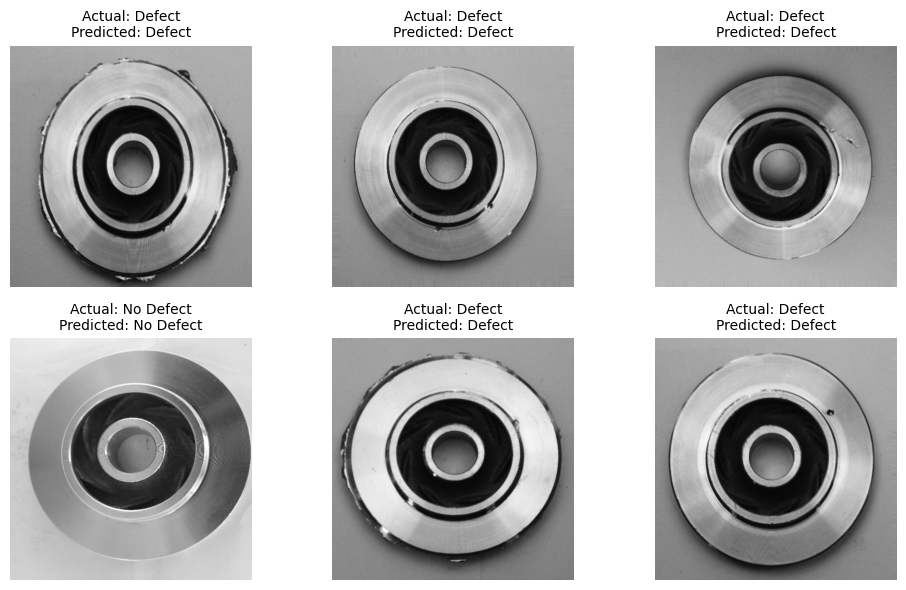

In [19]:
def get_predictions(model, dataloader):
    model.eval()
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            predictions = torch.sigmoid(outputs)
            all_predictions.append(predictions.cpu().numpy())
    
    return np.concatenate(all_predictions)

predictions = get_predictions(model, test_loader)

predictions_binary = (predictions[:, 0] > 0.5).astype(int)

true_labels = np.array(test_dataset.targets)

misclassified_indices = np.where(predictions_binary != true_labels)[0]



if len(misclassified_indices) >= 6:
    random_misclassified_indices = random.sample(list(misclassified_indices), 6)
else:
    random_misclassified_indices = random.sample(list(np.where(predictions_binary == true_labels)[0]), 6)

# Plot misclassified samples
plt.figure(figsize=(10, 6))

for i, index in enumerate(random_misclassified_indices):
    img_path = test_dataset.imgs[index][0]
    true_label = "Defect" if test_dataset.targets[index] == 0 else "No Defect"
    predicted_label = "No Defect" if predictions_binary[index] == 0 else "Defect"

    img = Image.open(img_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Actual: {true_label}\nPredicted: {predicted_label}", fontsize=10)
    plt.axis('off')

# Save the misclassification image grid
plt.savefig('sample_classification.png', dpi=300)
plt.tight_layout()
plt.show()

In [20]:
torch.save(model.state_dict(), 'AlexNet.pth')